<font size=5><b>Avocados EDA

In [29]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

file_path = '/Users/seanbunk/Desktop/Data_projects/avocado.csv'

data = pd.read_csv(file_path)
conn = sqlite3.connect('my_avocado.db')
conn.execute('DROP TABLE IF EXISTS avocado;')

data.to_sql('avocado', conn, if_exists= 'replace', index = False)

18249

In [30]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [31]:
#convert data types
data['Small Bags'] = pd.to_numeric(data['Small Bags'], errors='coerce')
data['Large Bags'] = pd.to_numeric(data['Large Bags'], errors='coerce')
data['XLarge Bags'] = pd.to_numeric(data['XLarge Bags'], errors='coerce')
data['Total Volume'] = pd.to_numeric(data['Total Volume'], errors='coerce')
data['AveragePrice'] = pd.to_numeric(data['AveragePrice'], errors='coerce')
data['year'] = data['year'].astype(int)
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [32]:
query = 'SELECT * FROM avocado'
data = pd.read_sql_query(query, conn)
cursor = conn.cursor()

print(data.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [33]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [34]:
verify_query = "SELECT * FROM avocado LIMIT 5;"
verified_data = pd.read_sql_query(verify_query, conn)
verified_data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [35]:
cursor.execute('DELETE FROM avocado WHERE rowid NOT IN (SELECT MIN(rowid) FROM avocado GROUP BY Date, AveragePrice);')

conn.commit()

In [36]:
query = 'SELECT * FROM avocado'
pd.read_sql_query(query, conn)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12293,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
12294,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
12295,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
12296,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [37]:
#check for duplicates
data.duplicated().sum()

0

In [38]:
#check for missing values
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<font size=5><b> How have avocado prices (AveragePrice) changed over the years included in the dataset? Is there a noticeable trend or seasonality in avocado prices?

In [40]:
query = """
SELECT year, AVG(AveragePrice) as AvgPrice
FROM avocado
GROUP BY year
ORDER BY year;
"""
price_trends = pd.read_sql_query(query, conn)
price_trends

,year,AvgPrice
0,2015,1.410377
1,2016,1.373768
2,2017,1.541574
3,2018,1.362404


In [41]:
#Trend
trend_query = """
SELECT strftime('%Y', Date) as Year, CAST((strftime('%m', Date) - 1) / 3 + 1 as INTEGER) as Quarter, AVG(AveragePrice) as AvgPrice
FROM avocado
GROUP BY Year, Quarter
ORDER BY Year, Quarter;"""

pd.read_sql_query(trend_query, conn)

,Year,Quarter,AvgPrice
0,2015,1,1.376151
1,2015,2,1.397780
2,2015,3,1.485517
3,2015,4,1.382839
4,2016,1,1.271036
5,2016,2,1.259221
6,2016,3,1.444737
7,2016,4,1.512324
8,2017,1,1.316027
9,2017,2,1.555088


<font size=3><b>The trends is average prices are increased in the third and fourth quarter of the year.

<font size=5><b>How has the total volume of avocados sold (Total Volume) varied over time?

In [42]:
query_schema = 'PRAGMA table_info(avocado);'
schema = pd.read_sql_query(query_schema, conn)
schema

,cid,name,type,notnull,dflt_value,pk
0,0,Unnamed: 0,INTEGER,0,None,0
1,1,Date,TEXT,0,None,0
2,2,AveragePrice,REAL,0,None,0
3,3,Total Volume,REAL,0,None,0
4,4,4046,REAL,0,None,0
5,5,4225,REAL,0,None,0
6,6,4770,REAL,0,None,0
7,7,Total Bags,REAL,0,None,0
8,8,Small Bags,REAL,0,None,0
9,9,Large Bags,REAL,0,None,0


In [43]:

query = """
SELECT year, SUM("Total Volume") as TotalVolume
FROM avocado
GROUP BY year
ORDER BY year;
"""
volume_trends = pd.read_sql_query(query, conn)
volume_trends


,year,TotalVolume
0,2015,2.279033e+09
1,2016,2.533913e+09
2,2017,2.940778e+09
3,2018,7.743966e+08


<font size=5><b>How do avocado prices and sales volumes vary across different regions? Are there certain regions where avocados are consistently more expensive or sell in larger volumes?

In [44]:
#Average prices by region
query = """
SELECT region, AVG(AveragePrice) as AvgPrice
FROM avocado
GROUP BY region
ORDER BY AvgPrice
"""

avg_price_by_region = pd.read_sql_query(query, conn)
avg_price_by_region

,region,AvgPrice
0,Houston,0.986962
1,DallasFtWorth,1.036486
2,SouthCentral,1.049557
3,PhoenixTucson,1.132328
4,CincinnatiDayton,1.184647
5,Nashville,1.198905
6,WestTexNewMexico,1.215487
7,LosAngeles,1.217174
8,Denver,1.220924
9,Columbus,1.246553


In [45]:
#Total volumes by region
query = """
SELECT region, AVG(AveragePrice) as AvgPrice
FROM avocado
GROUP BY region
ORDER BY AvgPrice DESC;
"""

total_volume_region = pd.read_sql_query(query, conn)
total_volume_region

,region,AvgPrice
0,SanFrancisco,1.966245
1,HartfordSpringfield,1.875101
2,NewYork,1.764511
3,Sacramento,1.737573
4,Philadelphia,1.669708
5,RaleighGreensboro,1.638702
6,Northeast,1.629269
7,Spokane,1.622045
8,Charlotte,1.621788
9,Orlando,1.614560


<font size=5><b>Does the type of avocado (e.g., conventional vs. organic) have a significant impact on the average price?

In [20]:
#Average prices by avocado type
query = """
SELECT type, AVG(AveragePrice) as AvgPrice
FROM avocado
GROUP BY type
ORDER BY AvgPrice;
"""
avg_price_by_type = pd.read_sql_query(query, conn)
avg_price_by_type

,type,AvgPrice
0,conventional,1.164204
1,organic,1.732110


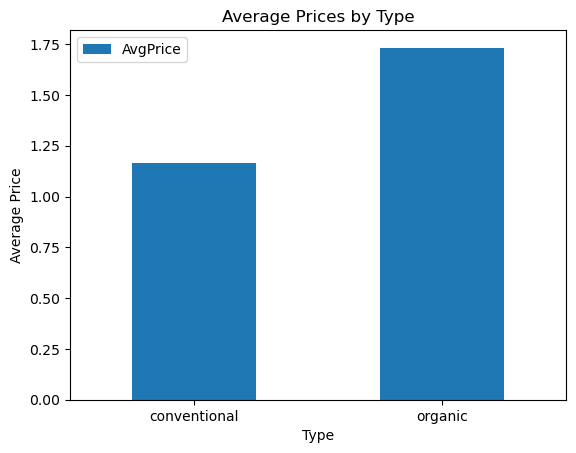

In [61]:
avg_price_by_type.plot(x ='type',y= 'AvgPrice',kind='bar')
plt.title('Average Prices by Type')
plt.xlabel('Type')
plt.xticks(rotation=0)
plt.ylabel('Average Price')
plt.grid=True
plt.show()

<font size=5><b>How do avocado prices fluctuate from one year to another? Are there any specific years with significant price increases or decreases?

In [46]:
query = """
SELECT year, AVG(AveragePrice) as AvgYearlyPrice
FROM avocado
GROUP BY year
ORDER by year;
"""

yearly_prices = pd.read_sql_query(query, conn)
print(yearly_prices)

   year  AvgYearlyPrice
0  2015        1.410377
1  2016        1.373768
2  2017        1.541574
3  2018        1.362404


In [47]:
yearly_prices['PriceChange'] = yearly_prices['AvgYearlyPrice'].pct_change() *100
yearly_prices

,year,AvgYearlyPrice,PriceChange
0,2015,1.410377,NaN
1,2016,1.373768,-2.595740
2,2017,1.541574,12.215060
3,2018,1.362404,-11.622563


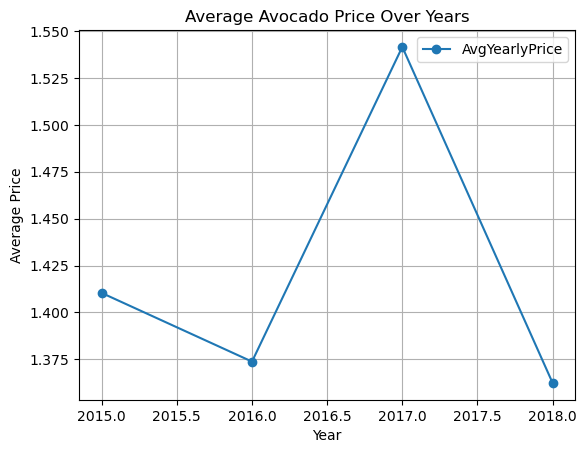

In [48]:
yearly_prices.plot(x ='year', y= 'AvgYearlyPrice', kind='line',marker='o')
plt.title('Average Avocado Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

<font size=5><b>Is there a correlation between the average price of avocados and the total volume sold? How do these variables interact?

In [51]:
query = """
SELECT year, AVG(AveragePrice)  as AvgPrice, SUM("Total Volume") as TotalVolume
FROM avocado
GROUP BY year;
"""
price_by_volume = pd.read_sql_query(query,conn)
price_by_volume


,year,AvgPrice,TotalVolume
0,2015,1.410377,2.279033e+09
1,2016,1.373768,2.533913e+09
2,2017,1.541574,2.940778e+09
3,2018,1.362404,7.743966e+08


In [52]:
correlation = price_by_volume['AvgPrice'].corr(price_by_volume['TotalVolume'])
print("Correlation coefficient", correlation)
#positive correlation

Correlation coefficient 0.6708326366161057


<font size=5><b>How do the sales (volume) of different PLU coded avocados compare? Does the demand for specific types of avocados (as indicated by PLU codes) change over time or across regions?

In [53]:
#compare total sales volumes of different PLU
query = """
SELECT SUM('4046') as Volume4046,
       SUM("4225") as Volume4225,
       SUM("4770") as Volume4770
FROM avocado;
"""
compare_PLU = pd.read_sql_query(query, conn)
compare_PLU

,Volume4046,Volume4225,Volume4770
0,49757708,2.962369e+09,2.355524e+08


In [54]:
#analyze changes over time
query = """
SELECT year,
       SUM("4046") as Volume4046,
       SUM("4225") as Volumne4225,
       SUM("4770") as Volume4770
FROM avocado
GROUP BY year
ORDER by year;
"""
over_time = pd.read_sql_query(query, conn)
over_time

,year,Volume4046,Volumne4225,Volume4770
0,2015,8.854456e+08,9.277311e+08,76880398.48
1,2016,7.956782e+08,8.820852e+08,84805938.97
2,2017,9.715559e+08,9.254948e+08,59367565.78
3,2018,2.543943e+08,2.270579e+08,14498540.58


In [55]:
#changes by region
query = """
SELECT region,
        SUM("4046") as Volume4046,
        SUM("4225") as Volume4225,
        SUM("4770") as Volume4770
FROM avocado
GROUP BY region
ORDER BY region;
"""
over_region = pd.read_sql_query(query, conn)
over_region

,region,Volume4046,Volume4225,Volume4770
0,Albany,6.102267e+05,1.271275e+07,55037.33
1,Atlanta,4.826206e+07,1.030217e+07,102498.91
2,BaltimoreWashington,1.176506e+07,8.103777e+07,4126603.92
3,Boise,6.355428e+06,1.097441e+06,1021687.34
4,Boston,1.553823e+06,6.567856e+07,1583224.13
5,BuffaloRochester,5.695484e+05,1.037258e+07,48233.21
6,California,3.666813e+08,3.242261e+08,29643211.90
7,Charlotte,6.813354e+06,1.091253e+07,3472666.81
8,Chicago,9.888821e+06,7.679024e+07,18105681.51
9,CincinnatiDayton,1.597785e+06,1.870198e+07,1021581.40


<font size=5><b>How does the distribution of avocado prices vary across different regions and types (organic vs. conventional)?

In [62]:
query = """
SELECT region, type, AVG(AveragePrice) as AvgPrice
FROM avocado
GROUP BY region, type
ORDER BY region, type;
"""
prices_vary = pd.read_sql_query(query, conn)
prices_vary 

,region,type,AvgPrice
0,Albany,conventional,1.348757
1,Albany,organic,1.796732
2,Atlanta,conventional,1.069277
3,Atlanta,organic,1.670222
4,BaltimoreWashington,conventional,1.343091
...,...,...,...
103,TotalUS,organic,1.544348
104,West,conventional,0.952990
105,West,organic,1.647471
106,WestTexNewMexico,conventional,0.839417


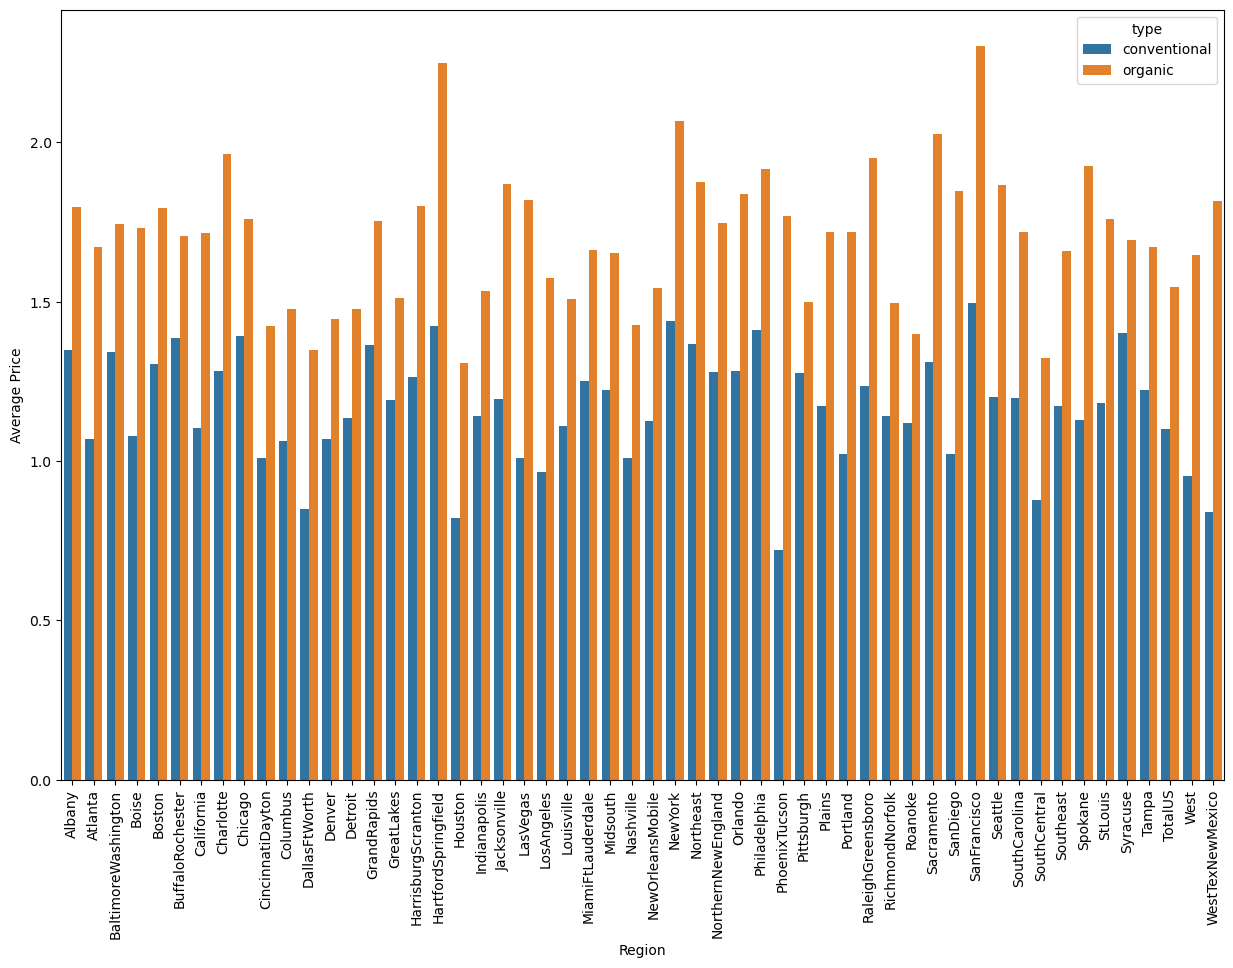

In [67]:
import seaborn as sns

plt.figure(figsize=(15,10))

sns.barplot(x='region', y='AvgPrice', hue='type', data = prices_vary)
plt.xticks(rotation=90)
plt.title=('Average Price of Avocados by Region and Type')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.show()

<font size=3><b>Organic is always significantly higher than conventional.

<font size=5><b>What is the overall sales trend of avocados over the years, and how does this trend differ between organic and conventional types?

In [68]:
query = """
SELECT year, type, SUM("Total Volume") as TotalVolume
FROM avocado
GROUP BY year, type
ORDER BY year, type;
"""
overall_sales = pd.read_sql_query(query,conn)
overall_sales

,year,type,TotalVolume
0,2015,conventional,2.227214e+09
1,2015,organic,5.181911e+07
2,2016,conventional,2.469188e+09
3,2016,organic,6.472437e+07
4,2017,conventional,2.852110e+09
5,2017,organic,8.866820e+07
6,2018,conventional,7.505432e+08
7,2018,organic,2.385343e+07


<font size=5><b>Thank you for viewing my EDA